# CS 109A/AC 209A/STAT 121A Data Science: Homework 3
**Harvard University**<br>
**Fall 2016**<br>
**Instructors: W. Pan, P. Protopapas, K. Rader**<br>
**Due Date: ** Wednesday, September 28th, 2016 at 11:59pm

Download the `IPython` notebook as well as the data file from Vocareum and complete locally.

To submit your assignment, in Vocareum, upload (using the 'Upload' button on your Jupyter Dashboard) your solution to Vocareum as a single notebook with following file name format:

`last_first_CourseNumber_HW3.ipynb`

where `CourseNumber` is the course in which you're enrolled (CS 109a, Stats 121a, AC 209a). Submit your assignment in Vocareum using the 'Submit' button.

**Avoid editing your file in Vocareum after uploading. If you need to make a change in a solution. Delete your old solution file from Vocareum and upload a new solution. Click submit only ONCE after verifying that you have uploaded the correct file. The assignment will CLOSE after you click the submit button.**

Problems on homework assignments are equally weighted. The Challenge Question is required for AC 209A students and optional for all others. Student who complete the Challenge Problem as optional extra credit will receive +0.5% towards your final grade for each correct solution. 

Import libraries

In [40]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression as Lin_Reg
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import scipy as sp
%matplotlib inline

## Problem 0: Basic Information

Fill in your basic information. 

### Part (a): Your name

[TIWARI, SANJAY]

### Part (b): Course Number

[CS 109a]

### Part (c): Who did you work with?

[NO ONE]

**All data sets can be found in the ``datasets`` folder and are in comma separated value (CSV) format**

## Problem 1: Multiple linear regression

### Part (a): Implement multiple linear regression from scratch

You are provided a data set containing attributes related to automobiles as well as their corresponding prices. The task is to build a linear regression model from scratch that can estimate the price of an automobile (response variable) using its attributes (predictor variables).

The file ``dataset_1_train.txt`` contains the training set that you can use to fit a regression model, and the file ``dataset_1_test.txt`` contains the test set that you can use to evaluate the model. In each file, the first two columns contain the predictors of the automobile, namely ``'horsepower'`` and ``'highway MPG'``, and the last column contains the automobile prices.

- Implement the following two functions from scratch. 

    - ``multiple_linear_regression_fit``:

        - takes as input: the training set, ``x_train``, ``y_train``

        - fits a multiple linear regression model

        - returns the model parameters (coefficients on the predictors, as an array, and the intercept, as a float).

    - ``multiple_linear_regression_score``:

        - takes model parameters (coefficients and intercept) and the test set, ``x_test`` ``y_test``, as inputs

        - returns the R^2 score for the model on the test set, along with the predicted y-values.
        
- Use your functions to predict automobile prices and evaluate your predictions.

**Note:** You **may not** use pre-built models or model evaluators for these tasks.

In [41]:
### Functions for fitting and evaluating multiple linear regression
### Functions for fitting and evaluating multiple linear regression

#--------  multiple_linear_regression_fit
# A function for fitting a multiple linear regression
# Fitted model: f(x) = x.w + c
# Input: 
#      x_train (n x d array of predictors in training data)
#      y_train (n x 1 array of response variable vals in training data)
# Return: 
#      w (d x 1 array of coefficients) 
#      c (float representing intercept)

def multiple_linear_regression_fit(x_train, y_train):
    
    # Append a column of one's to x
    n = x_train.shape[0]
    ones_col = np.ones((n, 1))
    
    x_train = np.concatenate((x_train, ones_col), axis=1)
    
    # Compute transpose of x
    x_transpose = np.transpose(x_train)
    
    # Compute coefficients: w = inv(x^T * x) * x^T * y
    # Compute intermediate term: inv(x^T * x)
    # Note: We have to take pseudo-inverse (pinv), just in case x^T * x is not invertible 
    x_t_x_inv = np.linalg.pinv(np.dot(x_transpose, x_train))
    #print 'y_train.shape', y_train.shape
    #print 'x_train.shape', x_train.shape
    #print 'x_transpose.shape', x_transpose.shape
    #print 'x_t_x_inv', x_t_x_inv.shape    
    # Compute w: inter_term * x^T * y 
    w = np.dot(np.dot(x_t_x_inv, x_transpose), y_train)
    
    # Obtain intercept: 'c' (last index)
    c = w[-1]
    
    return w[:-1], c

#--------  multiple_linear_regression_score
# A function for evaluating R^2 score and MSE 
# of the linear regression model on a data set
# Input: 
#      w (d x 1 array of coefficients)
#      c (float representing intercept)
#      x_test (n x d array of predictors in testing data)
#      y_test (n x 1 array of response variable vals in testing data)
# Return: 
#      r_squared (float) 
#      y_pred (n x 1 array of predicted y-vals)

def multiple_linear_regression_score(w, c, x_test, y_test):        
    # Compute predicted labels
    y_pred = np.dot(x_test, w) + c
    
    # Evaluate sqaured error, against target labels
    # sq_error = \sum_i (y[i] - y_pred[i])^2
    sq_error = np.sum(np.square(y_test - y_pred))
    
    # Evaluate squared error for a predicting the mean value, against target labels
    # variance = \sum_i (y[i] - y_mean)^2
    y_mean = np.mean(y_test)
    y_variance = np.sum(np.square(y_test - y_mean))
    
    # Evaluate R^2 score value
    r_squared = 1 - sq_error / y_variance

    return r_squared, y_pred, sq_error 

blue dots = train data
red dots = predicted test data - one predictore at a time


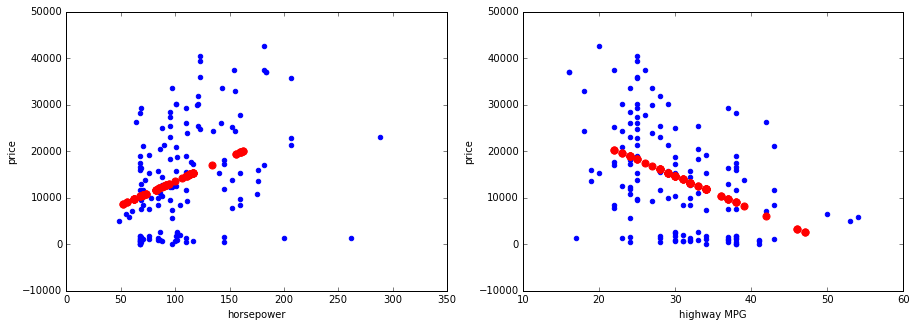

In [42]:
from sklearn.linear_model import LinearRegression as Lin_Reg

# Load train set
pd_data = pd.read_csv("datasets/dataset_1_train.txt")
pd_data_test = pd.read_csv("datasets/dataset_1_test.txt")

#print pd_data.shape
#print pd_data.columns
#print pd_data.head(n=1)

#print pd_data['horsepower'].values
#print pd_data[' price']

#print data_train[:,0],data_train[:,1]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

regression = Lin_Reg()

#horsepower
x_train = pd_data['horsepower'].values.reshape((pd_data.shape[0], 1)) 
x_test  = pd_data_test['horsepower'].values.reshape((pd_data_test.shape[0], 1)) 
regression.fit(x_train,pd_data[' price'])

#predict y-values
predicted_y = regression.predict(x_test)
ax1.scatter(pd_data['horsepower'].values,pd_data[' price'].values,color='blue')
ax1.scatter(pd_data_test['horsepower'].values,predicted_y,color='red', marker='o', s=50)


#horsepower
x_train = pd_data[' highway MPG'].values.reshape((pd_data.shape[0], 1)) 
x_test  = pd_data_test[' highway MPG'].values.reshape((pd_data_test.shape[0], 1)) 
regression.fit(x_train,pd_data[' price'])

#predict y-values
predicted_y = regression.predict(x_test)
ax2.scatter(pd_data[' highway MPG'].values,pd_data[' price'].values,color='blue')
ax2.scatter(pd_data_test[' highway MPG'].values,predicted_y,color='red', marker='o', s=50)


#ax2
ax1.set_xlabel('horsepower'); ax1.set_ylabel('price')
ax2.set_xlabel('highway MPG'); ax2.set_ylabel('price')

print 'blue dots = train data'
print 'red dots = predicted test data - one predictore at a time'

plt.show()


A simple linear regression lines seem to indicate there is some relation between both horsepower to price and highway MPG to price when performed linear regression separately. 
It cetainly makes sense to use multiple regression approach to find best fit.

multi-reg fit w: [  25.18654735 -598.10976496]
multi-reg fit c: 29887.9959233

blue dots  = test data
red dots   = predicted test data - one predictore at a time
green dots = train data


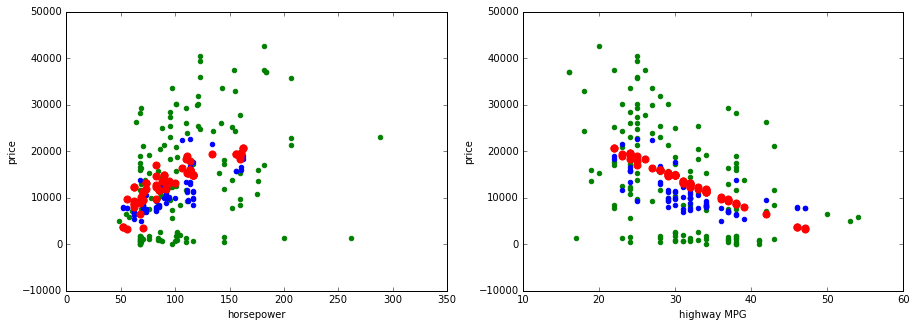

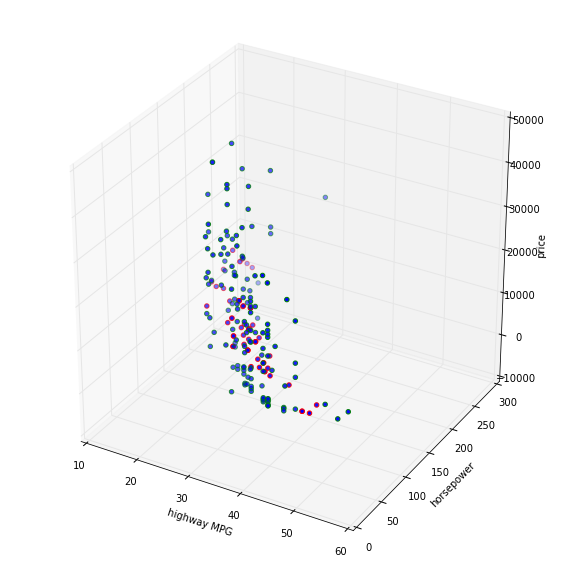

('R^2 score on test auto set:', 0.17794462732714034)
('Squared error on test set:', 1027585597.8088973)


In [43]:
# Load train and test data sets
# Split predictors from response
# Training
from mpl_toolkits.mplot3d import Axes3D

def plot3d_relation():
    data = pd_data
    age=data['horsepower'].values
    weight=data[' highway MPG'].values
    blood=data[' price'].values
    xx1, xx2 = np.meshgrid(np.linspace(age.min(), age.max(), 100),
        np.linspace(weight.min(), weight.max(), 100))
    Z = 56 + 0.8 * xx1 + .15 * xx2
    # create matplotlib 3d axes
    fig = plt.figure(figsize=(12, 8))
    ax = Axes3D(fig, azim=-115, elev=15)
    resid = blood-( 56+0.8*age+0.15*weight)
    # plot hyperplane
    surf = ax.plot_surface(xx1, xx2, Z, alpha=0.3, linewidth=0)
    ax.scatter(age[resid>0], weight[resid>0], blood[resid>0], color='black', alpha=1.0, facecolor='white')
    ax.scatter(age[resid<0], weight[resid<0], blood[resid<0], color='white', alpha=1.0, facecolor='white')
    ax.set_xlabel('HP')
    ax.set_ylabel('MPG')
    ax.set_zlabel('Price')
    return;
              
#plot3d_relation()

data_train = np.loadtxt('datasets/dataset_1_train.txt', delimiter=',', skiprows=1)
data_test = np.loadtxt('datasets/dataset_1_test.txt', delimiter=',', skiprows=1)
                  
y_train = data_train[:, -1]
x_train = data_train[:, :-1]

# Testing
y_test = data_test[:, -1]
x_test = data_test[:, :-1]

# Fit multiple linear regression model
w, c = multiple_linear_regression_fit(x_train, y_train)

print 'multi-reg fit w:', w
print 'multi-reg fit c:', c

print ''

print 'blue dots  = test data'
print 'red dots   = predicted test data - one predictore at a time'
print 'green dots = train data'

y_pred = np.dot(x_test, w) + c

#
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

#predict y-values
ax1.scatter(pd_data['horsepower'].values,pd_data[' price'].values,color='green')
ax1.scatter(pd_data_test['horsepower'].values,pd_data_test[' price'].values,color='blue')
ax1.scatter(pd_data_test['horsepower'].values,y_pred,color='red', marker='o', s=50)
#
ax1.set_xlabel('horsepower'); ax1.set_ylabel('price')
ax2.set_xlabel('highway MPG'); ax2.set_ylabel('price')
#
ax2.scatter(pd_data[' highway MPG'].values,pd_data[' price'].values,color='green')
ax2.scatter(pd_data_test[' highway MPG'].values,pd_data_test[' price'].values,color='blue')
ax2.scatter(pd_data_test[' highway MPG'].values,y_pred,color='red', marker='o', s=50)
#

fig1 = plt.figure(figsize=(10, 10))
axz = fig1.add_subplot(1,1,1, projection='3d')
axz.set_xlabel('highway MPG')
axz.set_ylabel('horsepower')
axz.set_zlabel('price')
axz.scatter(xs=pd_data_test[' highway MPG'].values, ys=pd_data_test['horsepower'].values, zs=y_pred, color='red')
axz.scatter(xs=pd_data[' highway MPG'].values, ys=pd_data['horsepower'].values, zs=pd_data[' price'].values, color='green')
        
plt.show()

#

# Evaluate model
r_squared, _ , sq_error= multiple_linear_regression_score(w, c, x_test, y_test)

print('R^2 score on test auto set:', r_squared)
print('Squared error on test set:', sq_error)


There is clear evidence of multi predictor influencing the price of automobile. 
For Multi-Linear R2 score seems a bit low at 0.17794, and squared error is very high. Interestingly the most deviation is coming from train data off with the predicted values.

### Part (b): Confidence interval on regression parameters
Using your linear regression implementation from Part (a), model the data in ``dataset_2.txt``, which contains five predictor variables in the first five columns, and the response variable in the last column.

Compute confidence intervals for the model parameters you obtain:

- Create 200 random subsamples of the data set of size 100, and use your function to fit a multiple linear regression model to each subsample. 

- For each coefficient on the predictor variables: plot a histogram of the values obtained across the subsamples, and calculate the confidence interval for the coefficients at a confidence level of 95%. 

- Highlight the mean coeffcient values and the end points of the confidence intervals using vertical lines on the histogram plot. How large is the spread of the coefficient values in the histograms, and how tight are the confidence intervals?

- Use the formula for computing confidence intervals provided in class (or use ``statmodels``) to compute the the confidence intervals. Compare confidence intervals you find through simulation to the ones given by the formula (or ``statmodels``), are your results what you would expect?

**Note:** You **may not** use pre-built models or model evaluators for these tasks.

Linear regression with all predictors


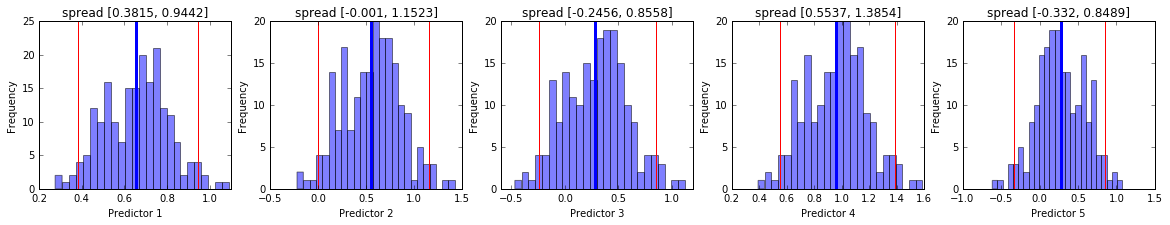

In [238]:
# Load train set
data = np.loadtxt("datasets/dataset_2.txt", delimiter=',', skiprows = 1)

# Size of data set, and subsample (10%)
x = data[:, :-1]
y = data[:, -1]

# Record size of the data set
n = x.shape[0]
d = x.shape[1]
subsample_size = 100

# No. of subsamples
num_samples = 200
    
### Linear regression with all 5 predictors

# Create a n x d array to store coefficients for 100 subsamples
coefs_multiple = np.zeros((num_samples, d))

print 'Linear regression with all predictors'

# Repeat for 200 subsamples
for i in range(num_samples):
    # Generate a random subsample of 50 data points
    perm = np.random.permutation(n) # Generate a list of indices 0 to n and permute it
    x_subsample = x[perm[:subsample_size], :] # Get x-vals for the first 50 indices in permuted list
    
    y_subsample = y[perm[:subsample_size]] # Get y-vals for the first 50 indices in permuted list

    # Fit linear regression model on subsample
    w, c = multiple_linear_regression_fit(x_subsample, y_subsample)
    # Store the coefficient for the model we obtain
    coefs_multiple[i, :] = w

# Plot histogram of coefficients, and report their confidence intervals 
fig, axes = plt.subplots(1, d, figsize=(20, 3))

# Repeat for each coefficient
for j in range(d):
    # Compute mean for the j-th coefficent from subsamples
    coef_j_mean = np.mean(coefs_multiple[:, j])
    
    # Compute confidence interval at 95% confidence level (use formula!)
    conf_int_left = np.percentile(coefs_multiple[:, j], 2.5)
    conf_int_right = np.percentile(coefs_multiple[:, j], 97.5)
       
    # Plot histogram of coefficient values
    axes[j].hist(coefs_multiple[:, j], bins=25, alpha=0.5)

    # Plot vertical lines at mean and left, right extremes of confidence interval
    axes[j].axvline(x = coef_j_mean, linewidth=3)
    axes[j].axvline(x = conf_int_left, linewidth=1, c='r')
    axes[j].axvline(x = conf_int_right, linewidth=1, c='r')
    
    # Set plot labels
    axes[j].set_title('spread [' + str(round(conf_int_left, 4)) 
                      + ', ' 
                      + str(round(conf_int_right, 4)) + ']')
    axes[j].set_xlabel('Predictor ' + str(j + 1))
    axes[j].set_ylabel('Frequency')

plt.show()

Spread is shown in th plots as above. The histogram shows that coefficient have normal distributions and mode is not very far from the mean. There are minor variations where Mean is left shifted vs right shifted. Coeeficient Confidence intervals seem to be tight as most of the left and right side are extreme outliears.

In [239]:
# Load train and test data sets

length= int(len(data)*0.8)
data_train = data[:length]
data_test = data[length:]


# Split predictors from response
# Training
y_train = data_train[:, -1]
x_train = data_train[:, :-1]

# Testing
y_test = data_test[:, -1]
x_test = data_test[:, :-1]

# Fit multiple linear regression model
w, c = multiple_linear_regression_fit(x_train, y_train)

print 'w:', w
print 'c:', c

# Evaluate model
r_squared, _, se = multiple_linear_regression_score(w, c, x_test, y_test)

print('R^2 score on test set:', r_squared)
print 'SE:', se
print '95% confidence levels Lower limit:' , w-2*se
print '95% confidence levels Upper limit:' , w+2*se

w: [ 0.60712424  0.46138547  0.19523769  0.88953159  0.37585867]
c: 2.49878242282
('R^2 score on test set:', 0.99966181940418919)
SE: 0.0171984669707
95% confidence levels Lower limit: [ 0.57272731  0.42698854  0.16084076  0.85513465  0.34146174]
95% confidence levels Upper limit: [ 0.64152117  0.4957824   0.22963463  0.92392852  0.4102556 ]


R2 value is very high indicating a good fit. Also SE seems to be low. Thus 95% confidence as calculated is shown above.

Comparing the confidence levels as calculated and from simulation gives us variation in the coefficients values. This is not surprising because simulation at the end would have much more varied data and thus more possible values. 
All predictor show strong relationship, i.e mean beta (estimated) values > 0. Thus H0 (NUll Hypothesis) is ruled out for 95% CI.

## Problem 2: Polynomial regression
In this problem, we revisit a dataset from Homework 1 and fit polynomial regression models to it. The dataset is provided in the file ``dataset_3.txt``, which contains a single predictor variable ``x`` in the first column and the response variable ``y`` in the second column. 

### Part(a): Implement polynomial regression from scratch

- Implement the following three functions from scratch:

    - ``polynomial_regression_fit``:
        - takes as input: training set, ``x_train``, ``y_train`` and the degree of the polynomial
        - fits a polynomial regression model 
        - returns the model parameters (array of coefficients and the intercept)

    - ``polynomial_regression_predict``: 
        - takes as input: the model parameters (array of coefficients and the intercept), the degree of the polynomial and the test set predictors ``x_test``
        - returns the response values predicted by the model on the test set. 

    - ``polynomial_regression_score``: 
        - takes an array of predicted response values and the array of true response values ``y_test``
        - returns R^2 score for the model on the test set, as well as the sum of squared errors

- Fit polynomial regression models of degrees 3, 5, 10 and 25 to the data set. Visualize the original data along with the fitted models for the various degrees in the same plot. 

For this problem, you may either use the multiple linear regression functions implemented in the Problem 1 or use the in-built functions in ``sklearn``.

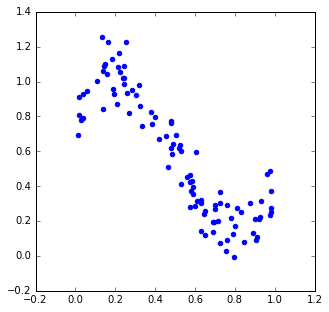

OLS fit w: [  3.19320604 -10.75864476   7.21240337]
OLS fit c: 0.773500178107
our own multi-fit w: [  3.19320604 -10.75864476   7.21240337]
our own multi-c: 0.773500178106


In [240]:
import statsmodels.api as sm

### Functions for fitting and evaluating polynomial regression

#--------  polynomial_regression_fit
# A function for fitting a multiple linear regression
# Fitted model: f(x) = x.w + c
# Input: 
#      x_train (n x d array of predictors in training data)
#      y_train (n x 1 array of response variable vals in training data)
#      degree 
# Return: 
#      w (d x 1 array of coefficients) 
#      c (float representing intercept)

def create_poly_sm(n, x, degrees):
    # Create the poly terms for x,x^2 ..
    
    #print '##n', n
    #x.shape = (len(x),1)
    x_poly = np.zeros([n, degrees]) # poly degree
    #print '##poly', x_poly
    #x_poly.shape = (len(x), degrees)
    #print 'x_poly.shape', x_poly.shape
    #print 'x_poly[:, 1].shape', x_poly[:, 1].shape
    #print 'np.power(x, 1).shape', np.power(x, 1).shape
    #print 'x.shape', x.shape
    #print np.power(x, degrees)
    #print x_poly[:, degrees-1]
    for d in range(1, degrees +1):
        x_poly[:, d - 1] = np.power(x, d).ravel() # adding terms
    
    return x_poly;
    
def create_poly(n, x, degrees):
    x_poly = np.zeros([n, degrees]) # poly degree
    #print '##poly', x_poly
    #x_poly.shape = (len(x), degrees)
    #print 'x_poly.shape', x_poly.shape
    #print 'x_poly[:, 1].shape', x_poly[:, 1].shape
    #print 'np.power(x, 1).shape', np.power(x, 1).shape
    #print 'x.shape', x.shape
    #print np.power(x, degrees)
    #print x_poly[:, degrees-1]
    for d in range(1, degrees +1):
        x_poly[:, d - 1] = np.power(x, d).ravel() # adding terms
    
    return x_poly;
 
def polynomial_regression_fit_vect(x_train, y_train, degrees):
    
    # Append a column of one's to x
    n = x_train.shape[0]
    x_train = create_poly_sm(n, x_train, degrees)
    #print 'n=', n
    ones_col = np.ones((n, 1))
    
    x_train = np.concatenate((x_train, ones_col), axis=1)
    
    # Compute transpose of x
    x_transpose = np.transpose(x_train)
    
    # Compute coefficients: w = inv(x^T * x) * x^T * y
    # Compute intermediate term: inv(x^T * x)
    # Note: We have to take pseudo-inverse (pinv), just in case x^T * x is not invertible 
    x_t_x_inv = np.linalg.pinv(np.dot(x_transpose, x_train))
    #print 'y_train.shape', y_train.shape
    #print 'x_train.shape', x_train.shape
    #print 'x_transpose.shape', x_transpose.shape
    #print 'x_t_x_inv', x_t_x_inv.shape    
    # Compute w: inter_term * x^T * y 
    w = np.dot(np.dot(x_t_x_inv, x_transpose), y_train)
    
    # Obtain intercept: 'c' (last index)
    c = w[-1]
    
    return w[:-1], c

#to compare how do we do with OLS libs
def polynomial_regression_fit_sm(x, y, degrees):
    #print '##poly', x_poly
    x_poly = create_poly_sm(np.size(y), x, degrees)
    Xt=sm.add_constant(x_poly)
    model=sm.OLS(y,Xt)
    model_results=model.fit()
    #print 'params', model_results.params
    #print model_results.predict()
    #print model_results.summary()
    #return model_results, Xt
    w =  model_results.params[1:]
    c =  model_results.params[0]
    #print w,c 
    return w,c, model_results

#      w (d x 1 array of coefficients)
#      c (float representing intercept)
#      x_test (n x d array of predictors in testing data)
#      y_pred (n x 1 array of response variable vals in testing data)
def polynomial_regression_predict(w, c, x_test, degrees):        
    # Compute predicted labels
    #print 'x_test.shape', (x_test.shape)
    #print 'x_test.size', (np.size(x_test))
    x_test_vect = create_poly(x_test.shape[0], x_test, degrees)
    #print 'x_test_vect.shape', x_test_vect.shape
    #print 'w.shape', w.shape
    y_pred = np.dot(x_test_vect, w) + c
    return y_pred;

def polynomial_regression_score(y_pred, y_test):        
    
    # Evaluate sqaured error, against target labels
    # sq_error = \sum_i (y[i] - y_pred[i])^2
    sq_error = np.sum(np.square(y_test - y_pred))
    
    # Evaluate squared error for a predicting the mean value, against target labels
    # variance = \sum_i (y[i] - y_mean)^2
    y_mean = np.mean(y_test)
    y_variance = np.sum(np.square(y_test - y_mean))
    
    # Evaluate R^2 score value
    r_squared = 1 - sq_error / y_variance

    return r_squared, y_pred, sq_error

data_train = np.loadtxt('datasets/dataset_3.txt', delimiter=',', skiprows=1)

#print data_train[:,0],data_train[:,1]
fig, axes = plt.subplots(1, 1, figsize=(5, 5))
axes.scatter(data_train[:,0],data_train[:,1],color='blue')
plt.show()

# Split predictors from response
# Training
y_train = data_train[:, -1]
x_train = data_train[:, :-1]

#print 'y_train.shape', y_train.shape
#print 'x_train.shape', x_train.shape
   
#x_train.reshape((len(x_train), 1))
# Testing
y_test = data_test[:, -1]
x_test = data_test[:, :-1]

# Fit multiple linear regression model

#x_train.reshape((len(x_train), 1))
w,c,_ = polynomial_regression_fit_sm(x_train, y_train, 3)

print 'OLS fit w:', w
print 'OLS fit c:', c
w,c = polynomial_regression_fit_vect(x_train, y_train, 3)

print 'our own multi-fit w:', w
print 'our own multi-c:', c
#w, c = multiple_linear_regression_fit(x_train, y_train)
#print 'w:', w
#print 'c:', c



# Evaluate model
#r_squared, _ , _= multiple_linear_regression_score(w, c, x_test, y_test)

#print('R^2 score on test set:', r_squared)

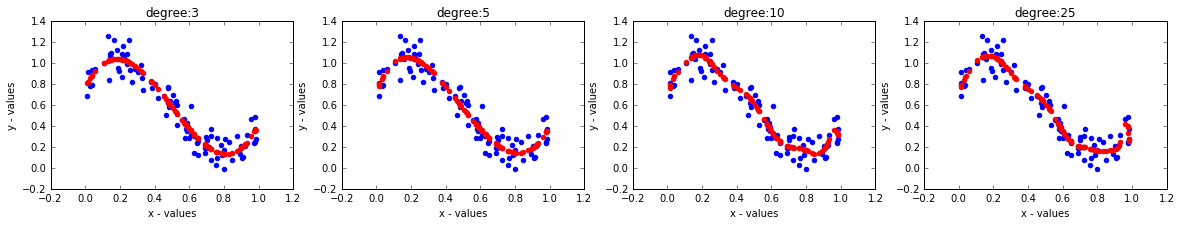

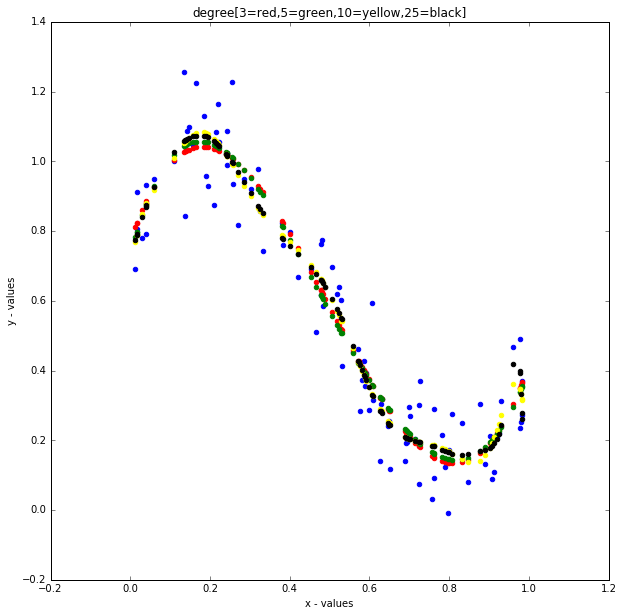

In [241]:
#n-fit and plot
#degrees 3, 5, 10 and 25

sim_degrees = [3, 5, 10, 25]
color_degrees = ['red', 'green', 'yellow', 'black']
fig, axes = plt.subplots(1, np.size(sim_degrees), figsize=(20, 3))

def plot_poly_reg(i, d, axes, common):
    w,c = polynomial_regression_fit_vect(x_train, y_train, d)
    y_pred = polynomial_regression_predict(w, c, x_train, d)
    axes.scatter(x_train,y_train,color='blue')
    axes.scatter(x_train,y_pred,color='red')
    common.scatter(x_train,y_pred,color=color_degrees[i])
    axes.set_title('degree:' + str(d))
    axes.set_xlabel('x - values')
    axes.set_ylabel('y - values')
    return;

fig1, axes2 = plt.subplots(1, 1, figsize=(10, 10))
axes2.scatter(x_train,y_train,color='blue')
axes2.set_title('degree[3=red,5=green,10=yellow,25=black]')
axes2.set_xlabel('x - values')
axes2.set_ylabel('y - values')
    
# Repeat for each coefficient
for d in range(np.size(sim_degrees)):
    plot_poly_reg(d, sim_degrees[d],axes[d], axes2)

#Now plot all these on the same plot

plt.show()


###  Part (b): Comparing training and test errors

- Split the data set in Problem 2 each into training and test sets: use the first 50% of the data for training and the remaining for testing. 


- Fit polynomial models of varying degree ranging from 1 to 15 to the training sets. Evaluate  the various fits on **both** the training and the test sets. Plot both the R^2 score of the fitted polynomial models on the training and test sets as a functions of the degree. 


- Describe the relationship between degree of the polynomial model and the fit on both the training and testing data. Explain, based on the plot, what is the best polynomial model for the data.

In [242]:
from sklearn.cross_validation import train_test_split

data_train = np.loadtxt('datasets/dataset_3.txt', delimiter=',', skiprows=1)

# Split predictors from response
# Training
y = data_train[:, -1]
X = data_train[:, :-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50)    

#X_train = X_train.ravel()
#X_test = X_test.ravel()

print X_train.shape, X_test.shape, y_train.shape, y_test.shape

#print 'y_train.shape', y_train.shape
#print 'x_train.shape', x_train.shape
   
#x_train.reshape((len(x_train), 1))
# Testing
#y_test = data_test[:, -1]
#x_test = data_test[:, :-1]

# Fit multiple linear regression model
w,c,result = polynomial_regression_fit_sm(X_train, y_train, 3)


#print 'sm multi-fit w:', w
#print 'sm multi-fit c:', c

w,c = polynomial_regression_fit_vect(X_train, y_train, 3)
#print 'w.shape', w.shape
#print 'c.shape', c.shape
y_pred = polynomial_regression_predict(w, c, X_train, 3)
r2, s, t = polynomial_regression_score(y_pred, y_train) 
print 'our own multi-fit w:', w
print 'our own multi-fit c:', c

print 'r2', r2

(50L, 1L) (50L, 1L) (50L,) (50L,)
our own multi-fit w: [  2.97071393 -10.10876341   6.74910828]
our own multi-fit c: 0.785407284066
r2 0.931585219864


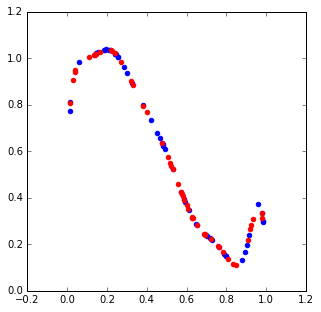

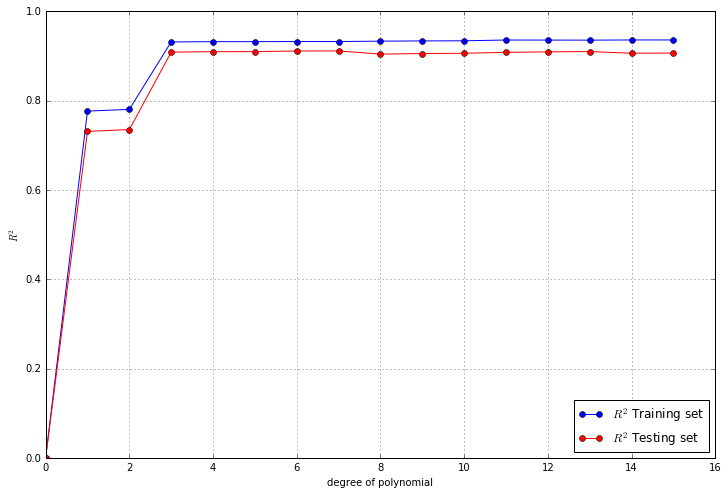

In [243]:
degrees=15
R2_test = np.zeros([ degrees+1,1])
R2 = np.zeros([ degrees+1,1])
#AIC = np.zeros([ degrees+1,1])
#BIC = np.zeros([ degrees+1,1])
R2adj = np.zeros([ degrees+1,1])
#print 'R2.shape', R2.shape
#print 'R2_test.shape', R2_test.shape

for d in range(1, degrees +1):
    #print d
    w,c = polynomial_regression_fit_vect(X_train, y_train, d)
    #print 'w.shape', w.shape
    #print 'c.shape', c.shape
    y_pred = polynomial_regression_predict(w, c, X_train, d)
    R2[d], _, _ = polynomial_regression_score(y_pred, y_train) 
    y_pred = polynomial_regression_predict(w, c, X_test, d)
    R2_test[d], _, _ = polynomial_regression_score(y_pred, y_test)

#print R2
#print R2_test
y_pred = polynomial_regression_predict(w, c, X_train, 15)
fig, axes = plt.subplots(1, 1, figsize=(5, 5))
axes.scatter(X_train,y_pred,color='blue')
y_pred = polynomial_regression_predict(w, c, X_test, 15)
axes.scatter(X_test,y_pred,color='red')
plt.show()

plt.figure(figsize=(12,8))
plt.plot(R2, 'bo-', label=r'$R^2$ Training set')
plt.plot(R2_test, 'ro-', label=r'$R^2$ Testing set')
plt.xlabel('degree of polynomial'); plt.ylabel(r'$R^2$')
plt.xlabel('degree of polynomial'); plt.ylabel(r'$R^2$')
plt.legend(loc='best')
plt.grid()

As degrees of polynomial goes up, score R2 for training data goes up and approaching to max out at value of 1.0 as degree approaches infinity

For testing data it does match a very similar trend. However degree=3 polynomial the R2 values flattens for both testing and train predictions.
Thus 3rd degree polynomial would give us the best model.

## Problem 3: Model selection criterion
In this problem, we examine various criteria that help us decide how to choose between multiple models for the same data.

###  Part (a): How does one choose the best polynomial degree?
In Problem 2, you fitted polynomials of different degrees to the entire data set, and inspected the quality of fits on the test set. In practice, one needs to find the 'best' model for the given prediction task using **only** the training set. For this, we'll now make use of two model selection criteria, namely, the Akaike Information Criterion (AIC) and the Bayesian Information Criterion (BIC). These are evaluated on the training set, but serve as a proxy for the test set accuracy.

For ``dataset_3.txt``, do the following:

- For each polynomial model you fitted, compute the AIC and BIC for the model on the training set. Plot the criterion values as a function of the polynomial degree.


- Which model is chosen by each criterion? Do they match with the model that yields maximum test R^2 score?

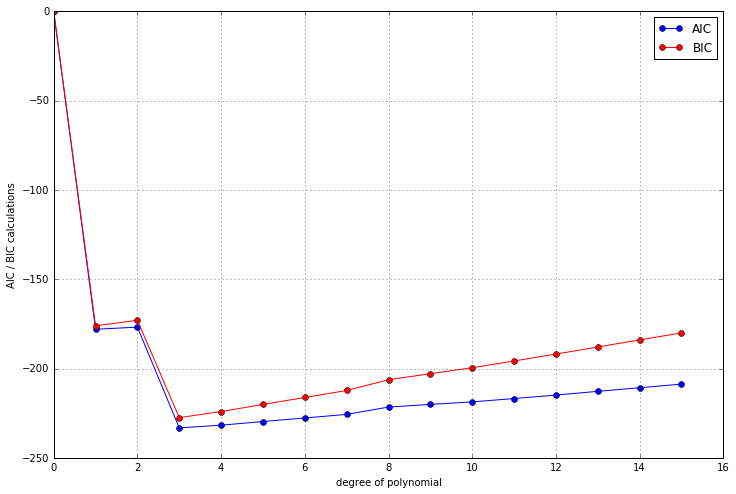

In [244]:
def compute_abic(RSS, n, degree):
    aic =  n*(np.log(RSS/n)) + 2*degree
    bic =  n*(np.log(RSS/n)) + degree*(np.log(n))
    return aic, bic

sq_err = np.zeros([ degrees+1,1])
aic = np.zeros([ degrees+1,1])
bic = np.zeros([ degrees+1,1])

for d in range(1, degrees +1):
    #print d
    w,c = polynomial_regression_fit_vect(X, y, d)
    #print 'w.shape', w.shape
    #print 'c.shape', c.shape
    y_pred = polynomial_regression_predict(w, c, X_train, d)
    _, _, sq_err[d] = polynomial_regression_score(y_pred, y_train) 
    aic[d], bic[d] = compute_abic(sq_err[d], np.size(y_train), d)

#print aic
#print bic
plt.figure(figsize=(12,8))
plt.plot(aic, 'bo-', label=r'AIC')
plt.plot(bic, 'ro-', label=r'BIC')
plt.xlabel('degree of polynomial'); plt.ylabel(r'AIC / BIC calculations')
plt.legend(loc='best')
plt.grid()

plt.show()

Both AIC and BIC calculations predict the correct polynomial model as noted before using R2 chart.
AIC seems to match better with gradual degradation and becomes flat. BIC seems to penalize more thus choosing BIC would give us better results.

### Part (b): Application to New York taxi cab density estimation

We shall now apply the concepts learned so far to a real-world prediction task. You are asked to build a regression model for estimating the density of Green cab taxis at any given time of a day in New York city. The model needs to take the time of the day (in minutes) as input, and predict the expected number of pick ups at that time.

The data set for this problem can be downloaded from the following URL: https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2015-01.csv. The file contains the details of all pickups by Green cabs in New York City during January 2015. 

In [304]:
import io
import requests
url="https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2015-01.csv"
s=requests.get(url).content
#ny_taxi_data=pd.read_csv(io.StringIO(s.decode('utf-8')), header=None)
col_names = ['VendorID','lpep_pickup_datetime','Lpep_dropoff_datetime','Store_and_fwd_flag','RateCodeID','Pickup_longitud','Pickup_latitude','Dropoff_longitudeR','DroPpoff_latitude','Passenger_count','Trip_distance','Fare_amount','Extra','MTA_tax','Tip_amount','Tolls_amount','Ehail_fee','improvement_surcharge','Total_amount','Payment_type','Trip_type','None1','None2']
#print col_names
ny_taxi_data=pd.read_csv(io.StringIO(s.decode('utf-8')), names=col_names, skiprows=1, index_col=False)
print 'Downloaded:', ny_taxi_data.shape
#print ny_taxi_data.head(n=1)

Downloaded: (1508501, 23)


In [305]:
#this section is for debug purpose and assigns data downloaded to ny
#col_names = ['VendorID','lpep_pickup_datetime','Lpep_dropoff_datetime','Store_and_fwd_flag','RateCodeID','Pickup_longitud','Pickup_latitude','Dropoff_longitudeR','DDroPpoff_latitude','Passenger_count','Trip_distance','Fare_amount','Extra','MTA_tax','Tip_amount','Tolls_amount','Ehail_fee','improvement_surcharge','Total_amount','Payment_type','Trip_type','None1','None2']
#print col_names
#ny=pd.read_csv('datasets/green_tripdata_2015-01_1_10.csv', names=col_names, skiprows=1, index_col=False)

ny=ny_taxi_data
print 'Abstracted reference assigned:', ny.shape

#print ny.head(n=1)
#print ny.head(n=1)['VendorID']
#print ny.head(n=1)['lpep_pickup_datetime']
#print ny.columns

Abstracted reference assigned: (1508501, 23)


New Series (1508501L,)


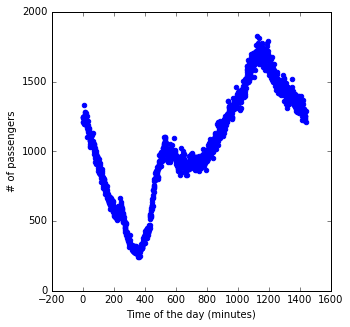

In [307]:
from dateutil.parser import parse
from datetime import datetime

#print ny.head(n=1)['lpep_pickup_datetime']

#df['lpep_pickup_datetime'] = df['lpep_pickup_datetime'].apply(lambda x: int(str(x)[-4:]))

def convert_to_min(date_in_some_format):
    mydate = parse(date_in_some_format)
    mins = 60*int(mydate.hour)
    mins += int(mydate.minute)
    return mins

my_series = ny['lpep_pickup_datetime'].apply(convert_to_min)
#print type(my_series)
print 'New Series', my_series.shape
my_series = my_series.value_counts()
#print my_series.shape
#print (my_series[3])

#Frequency/Count of customers
np_arr = [(my_series.index),(my_series.values)]

#print my_series.index
#print my_series.values
fig, axes = plt.subplots(1, 1, figsize=(5, 5))
#axes.scatter(my_series.index,my_series.values,color='blue')
axes.scatter(np_arr[0],np_arr[1],color='blue')
plt.xlabel('Time of the day (minutes)'); plt.ylabel('# of passengers')

plt.show()


Max R2 for Test  [ 0.86452218] observed at degree 93
Min AIC for Test [ 7217.48557791] observed at degree 26
Min BIC for Test [ 7336.54610942] observed at degree 26


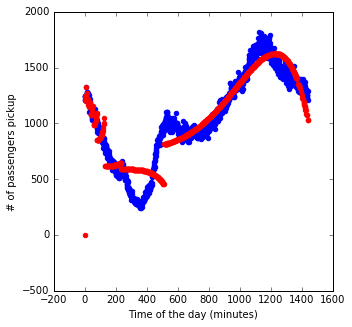

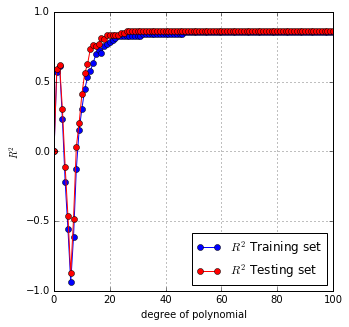

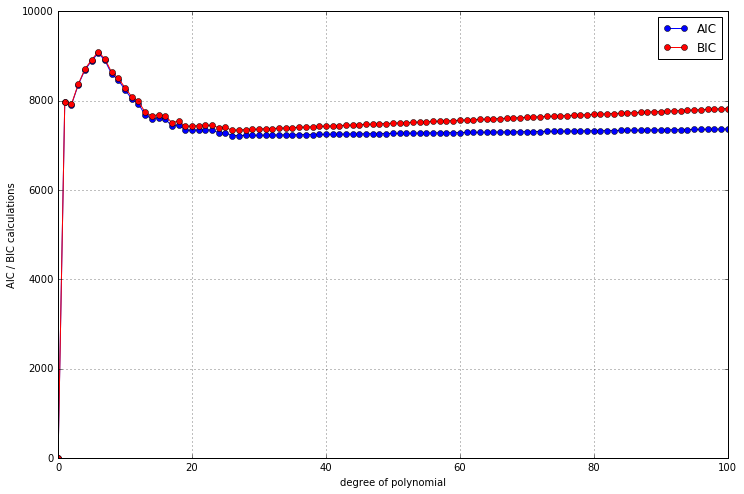

In [310]:
from sklearn.cross_validation import train_test_split

data_train = np_arr

# Split predictors from response
# Training
y = data_train[1]
X = data_train[0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50)    

#print X_train.shape, X_test.shape, y_train.shape, y_test.shape

degrees = 100

R2_test = np.zeros([ degrees+1,1])
R2 = np.zeros([ degrees+1,1])

w,c = polynomial_regression_fit_vect(X_train, y_train, degrees)
#print 'w.shape', w.shape
#print 'c.shape', c.shape
y_pred = polynomial_regression_predict(w, c, X_train, degrees)
r2, s, t = polynomial_regression_score(y_pred, y_train) 
#print 'our own multi-fit w:', w
#print 'our own multi-fit c:', c

fig, axes = plt.subplots(1, 1, figsize=(5, 5))
axes.scatter(np_arr[0],np_arr[1],color='blue')
axes.scatter(X_train,y_pred,color='red')
plt.legend(loc='best')
plt.xlabel('Time of the day (minutes)'); plt.ylabel('# of passengers pickup')

#print 'r2', r2

min_aic = 0
min_bic = 0

def compute_abic(RSS, n, degree):
    aic_ =  n*(np.log(RSS/n)) + 2*degree
    bic_ =  n*(np.log(RSS/n)) + degree*(np.log(n))
    #print ' bic=', bic_, 'degree =', degree
    return aic_, bic_

sq_err = np.zeros([ degrees+1,1])
aic = np.zeros([ degrees+1,1])
bic = np.zeros([ degrees+1,1])

for d in range(1, degrees +1):
    #print d
    w,c = polynomial_regression_fit_vect(X, y, d)
    #print 'w.shape', w.shape
    #print 'c.shape', c.shape
    y_pred = polynomial_regression_predict(w, c, X_train, d)

    #fig, axes = plt.subplots(1, 1, figsize=(5, 5))
    #axes.scatter(X_train,y_pred,color='yellow')
    R2[d], _, sq_err[d] = polynomial_regression_score(y_pred, y_train) 
    y_pred = polynomial_regression_predict(w, c, X_test, d)
    
    R2_test[d], _, sq_err[d] = polynomial_regression_score(y_pred, y_test) 
    aic[d], bic[d] = compute_abic(sq_err[d], np.size(y_train), d)


r2_max_val, r2_max_pos = max((b,a) for a,b in enumerate (R2_test) if b > 0)
#aic_min_val = min(i for i in aic if i > 0)
aic_min_val, aic_min_pos = min((b,a) for a,b in enumerate (aic) if b > 0)
bic_min_val, bic_min_pos = min((b,a) for a,b in enumerate (bic) if b > 0)
print 'Max R2 for Test ',  r2_max_val, 'observed at degree', r2_max_pos
print 'Min AIC for Test', aic_min_val , 'observed at degree', aic_min_pos
print 'Min BIC for Test', bic_min_val , 'observed at degree', bic_min_pos

plt.figure(figsize=(5,5))
plt.plot(R2, 'bo-', label=r'$R^2$ Training set')
plt.plot(R2_test, 'ro-', label=r'$R^2$ Testing set')
plt.xlabel('degree of polynomial'); plt.ylabel(r'$R^2$')
plt.legend(loc='best')
plt.grid()

#print aic
#print bic
plt.figure(figsize=(12,8))
plt.plot(aic, 'bo-', label=r'AIC')
plt.plot(bic, 'ro-', label=r'BIC')
plt.xlabel('degree of polynomial'); plt.ylabel(r'AIC / BIC calculations')
plt.legend(loc='best')
plt.grid()

plt.show()

Using the Polynomial regression the above solution suggests that R2 score will go high as degree of polynomial is increased, the highest is seen at degree of 93 with R2 value 0.86. 
The AIC and BIC calculation show a different picture where the polynomial is best fit at polynomial degree of 26. Polynomial degree of 26 still produces R2 score of 0.80.

## Challenge Problem: Advanced regression techniques
In this problem, we revisit the automobile pricing data set in Problem 1(a) and explore advanced regression techniques to build better models. 


### Part (a): Polynomial regression on multi-dimensions
In Problems 2-3, you had implemented a polynomial regression technique for data sets with a single predictor variable. How would you use a similar approach to fit a polynomial model on data sets with more than one predictor?

Reload ``dataset_1_train.txt`` and ``dataset_1_test.txt``. Fit polynomial models of degrees 2 and 3 to the training set, and evaluate the R^2 score of the fitted model on the test set. How do they compare with the test performance of a linear regression model?

In [9]:

data_train = np.loadtxt('datasets/dataset_1_train.txt', delimiter=',', skiprows=1)
data_test = np.loadtxt('datasets/dataset_1_test.txt', delimiter=',', skiprows=1)

y_train = data_train[:, -1]
x_train = data_train[:, :-1]

#create variable independednt polynomials (x,y) (x^2,y2) (x^3,y^3)
def create_3degree_poly(my_array):
    myarray1 = my_array
    myarray2 = (my_array**2)
    myarray3 = (my_array**3)
    z_myarray = np.hstack((myarray1,myarray2,myarray3))
    return z_myarray;
    
x_train3 = create_3degree_poly(x_train)

# Testing
y_test = data_test[:, -1]
x_test = data_test[:, :-1]

x_test3 = create_3degree_poly(x_test)
# Fit multiple linear regression model

w, c = multiple_linear_regression_fit(x_train3, y_train)

print 'blue dots  = test data'
print 'red dots   = predicted test data - one predictore at a time'
print 'green dots = train data'

y_pred = np.dot(x_test3, w) + c



# Evaluate model
r_squared, _ , sq_error= multiple_linear_regression_score(w, c, x_test3, y_test)

print('R^2 score on test auto set:', r_squared)
print('Squared error on test set:', sq_error)


blue dots  = test data
red dots   = predicted test data - one predictore at a time
green dots = train data
('R^2 score on test auto set:', 0.28093513969784933)
('Squared error on test set:', 898845404.94452226)


blue dots  = test data
red dots   = predicted test data - one predictore at a time
green dots = train data


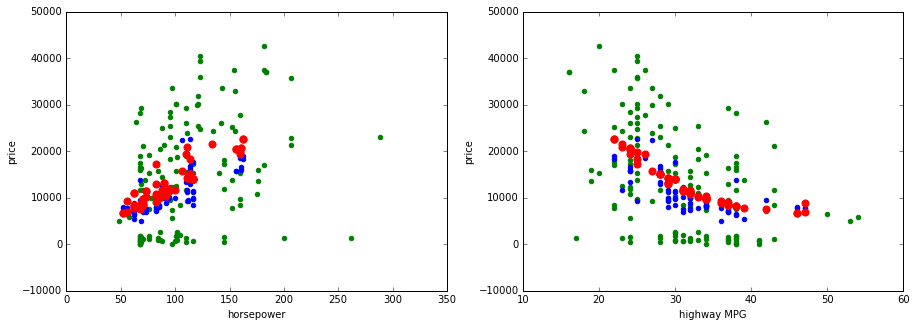

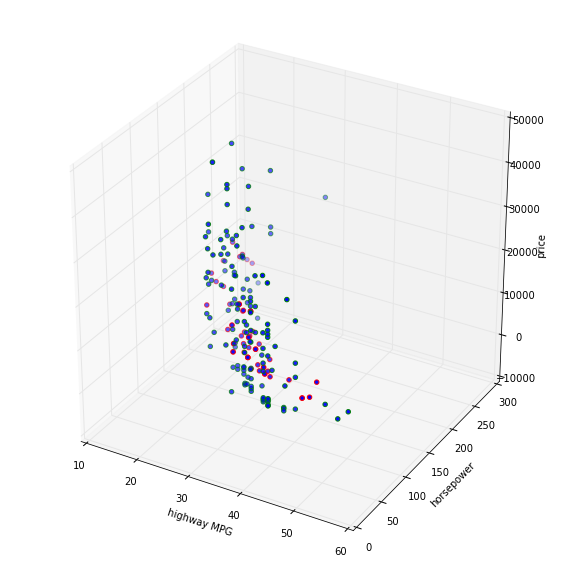

('R^2 score on test auto set:', 0.40063119273728276)
('Squared error on test set:', 749222953.33524454)


In [10]:
#
data_train = np.loadtxt('datasets/dataset_1_train.txt', delimiter=',', skiprows=1)
data_test = np.loadtxt('datasets/dataset_1_test.txt', delimiter=',', skiprows=1)

#print '0'
#print 'data_train[0]', data_train[0]
y_train = data_train[:, -1]
x_train = data_train[:, :-1]

def swap_cols(arr, frm, to):
    arr[:,[frm, to]] = arr[:,[to, frm]]

# create all possible polynomial terms as (x^p.y^q)
def create_3degree_poly(my_array):
    arr_1_cp = np.array(my_array)
    swap_cols(arr_1_cp, 0, 1)
    myarray1 = my_array
    myarray2 = (my_array**2)
    myarray3 = (my_array**3)
    myarray12 = arr_1_cp*myarray2
    myarray13 = myarray1*arr_1_cp
    z_myarray = np.hstack((myarray1,myarray2,myarray3, myarray12,myarray13))
    return z_myarray;
    
#x_train2 =  (x_train**2)
#x_train3 =  (x_train**3)


#print 'x_train2[0]**2', x_train2[0]
#print 'x_train.shape', x_train.shape
x_train3 = create_3degree_poly(x_train)
#print 'x_train3.shape', x_train3.shape
#z_train = np.hstack((x_train,x_train2,x_train3))
#print 'z_train.shape', z_train.shape
#print z_train


# Testing
y_test = data_test[:, -1]
x_test = data_test[:, :-1]

x_test3 = create_3degree_poly(x_test)
# Fit multiple linear regression model

w, c = multiple_linear_regression_fit(x_train3, y_train)

#print 'multi-reg fit w:', w
#print 'multi-reg fit c:', c

#print ''

print 'blue dots  = test data'
print 'red dots   = predicted test data - one predictore at a time'
print 'green dots = train data'

y_pred = np.dot(x_test3, w) + c

#
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

#predict y-values
ax1.scatter(pd_data['horsepower'].values,pd_data[' price'].values,color='green')
ax1.scatter(pd_data_test['horsepower'].values,pd_data_test[' price'].values,color='blue')
ax1.scatter(pd_data_test['horsepower'].values,y_pred,color='red', marker='o', s=50)
#
ax1.set_xlabel('horsepower'); ax1.set_ylabel('price')
ax2.set_xlabel('highway MPG'); ax2.set_ylabel('price')
#
ax2.scatter(pd_data[' highway MPG'].values,pd_data[' price'].values,color='green')
ax2.scatter(pd_data_test[' highway MPG'].values,pd_data_test[' price'].values,color='blue')
ax2.scatter(pd_data_test[' highway MPG'].values,y_pred,color='red', marker='o', s=50)
#

fig1 = plt.figure(figsize=(10, 10))
axz = fig1.add_subplot(1,1,1, projection='3d')
axz.set_xlabel('highway MPG')
axz.set_ylabel('horsepower')
axz.set_zlabel('price')
axz.scatter(xs=pd_data_test[' highway MPG'].values, ys=pd_data_test['horsepower'].values, zs=y_pred, color='red')
axz.scatter(xs=pd_data[' highway MPG'].values, ys=pd_data['horsepower'].values, zs=pd_data[' price'].values, color='green')
        
plt.show()

#

# Evaluate model
r_squared, _ , sq_error= multiple_linear_regression_score(w, c, x_test3, y_test)

print('R^2 score on test auto set:', r_squared)
print('Squared error on test set:', sq_error)


R2 of independent 3rd degree terms polynomial has increased from 0.177 that of linear regression model to a value of 0.281, a signficant increase of 59% in R2 score.
The same with all possible polynomial terms with all combinations has increased from 0.177 belonging to linear regression model to a value of 0.40, a signficant increase of 126% in R2 score.

### Part (b): Weighted linear regression

Suppose you are told that some of the prices recorded in the training set are noisy, and you are given the list of noisy points, how would you use this information during training to fit a better regression model?

The noise level for each training point is provided in the file dataset_1_train_noise_levels.txt. A noise level 'none' indicates that the price is accurate, and a noise level 'noisy' indicates that the price is only moderately accurate. 

We want to fit a linear regression model that accounts for this new information. One way to do this is to assign different weights to each training point based on the amount of noise associated to that training point. That is, our loss function is now
$$
\sum_{i=1}^n \alpha_i\,(y_i \,-\, w^T x_i)^2
$$
where $\alpha_i$ is a number representing how much you value the contribution of the data point $x_i$.

How does the R^2 score (evaluated on the test set) of the new linear model compare to the one fitted using plain linear regression?

blue dots  = test data
red dots   = predicted test data - one predictore at a time
green dots = train data


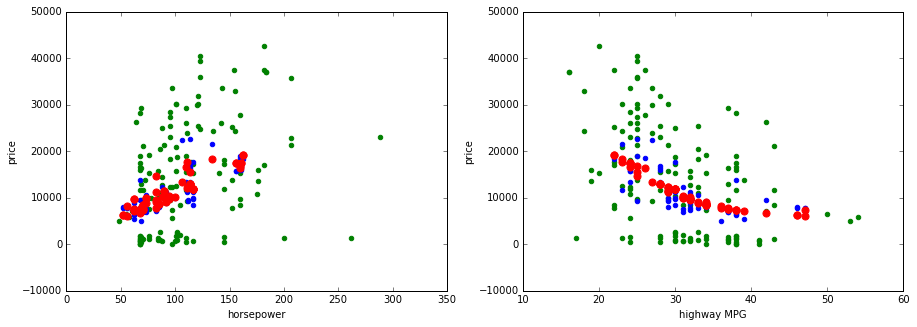

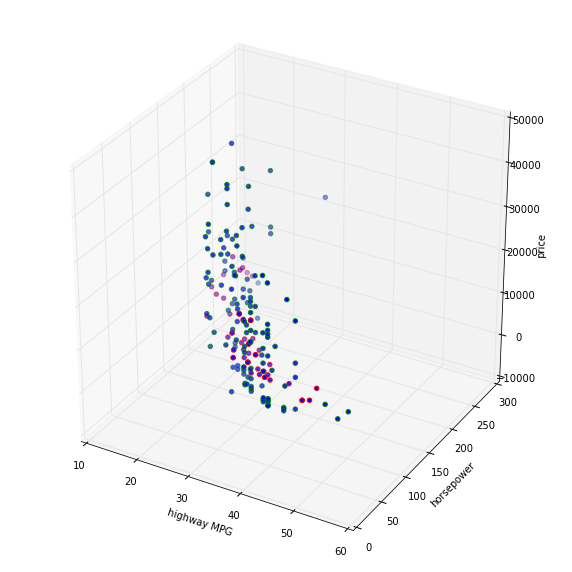

('R^2 score on test auto set:', 0.62307561080162421)
('Squared error on test set:', 471162997.86936957)


In [56]:
influence_data = np.genfromtxt('datasets/dataset_1_train_noise_levels.txt',usecols=(0),skip_header=1,dtype=None)
influence_factor = 0.85
influence_data[influence_data == 'noisy'] = influence_factor
influence_data[influence_data == 'none'] = (1+influence_factor)
influence_data = influence_data.astype('float64')

data_train = np.loadtxt('datasets/dataset_1_train.txt', delimiter=',', skiprows=1)
data_test = np.loadtxt('datasets/dataset_1_test.txt', delimiter=',', skiprows=1)

#print data_train.shape
#print influence_data.shape

y_train = data_train[:, -1]
y_train *= influence_data
x_train = data_train[:, :-1]

def swap_cols(arr, frm, to):
    arr[:,[frm, to]] = arr[:,[to, frm]]

# create all possible polynomial terms as (x^p.y^q)
def create_3degree_poly(my_array):
    arr_1_cp = np.array(my_array)
    swap_cols(arr_1_cp, 0, 1)
    myarray1 = my_array
    myarray2 = (my_array**2)
    myarray3 = (my_array**3)
    myarray12 = arr_1_cp*myarray2
    myarray13 = myarray1*arr_1_cp
    z_myarray = np.hstack((myarray1,myarray2,myarray3, myarray12,myarray13))
    return z_myarray;
    
#x_train2 =  (x_train**2)
#x_train3 =  (x_train**3)


#print 'x_train2[0]**2', x_train2[0]
#print 'x_train.shape', x_train.shape
x_train3 = create_3degree_poly(x_train)
#print 'x_train3.shape', x_train3.shape
#z_train = np.hstack((x_train,x_train2,x_train3))
#print 'z_train.shape', z_train.shape
#print z_train


# Testing
y_test = data_test[:, -1]
x_test = data_test[:, :-1]

x_test3 = create_3degree_poly(x_test)
# Fit multiple linear regression model

w, c = multiple_linear_regression_fit(x_train3, y_train)

#print 'multi-reg fit w:', w
#print 'multi-reg fit c:', c

#print ''

print 'blue dots  = test data'
print 'red dots   = predicted test data - one predictore at a time'
print 'green dots = train data'

y_pred = np.dot(x_test3, w) + c

#
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

#predict y-values
ax1.scatter(pd_data['horsepower'].values,pd_data[' price'].values,color='green')
ax1.scatter(pd_data_test['horsepower'].values,pd_data_test[' price'].values,color='blue')
ax1.scatter(pd_data_test['horsepower'].values,y_pred,color='red', marker='o', s=50)
#
ax1.set_xlabel('horsepower'); ax1.set_ylabel('price')
ax2.set_xlabel('highway MPG'); ax2.set_ylabel('price')
#
ax2.scatter(pd_data[' highway MPG'].values,pd_data[' price'].values,color='green')
ax2.scatter(pd_data_test[' highway MPG'].values,pd_data_test[' price'].values,color='blue')
ax2.scatter(pd_data_test[' highway MPG'].values,y_pred,color='red', marker='o', s=50)
#

fig1 = plt.figure(figsize=(10, 10))
axz = fig1.add_subplot(1,1,1, projection='3d')
axz.set_xlabel('highway MPG')
axz.set_ylabel('horsepower')
axz.set_zlabel('price')
axz.scatter(xs=pd_data_test[' highway MPG'].values, ys=pd_data_test['horsepower'].values, zs=y_pred, color='red')
axz.scatter(xs=pd_data[' highway MPG'].values, ys=pd_data['horsepower'].values, zs=pd_data[' price'].values, color='green')
        
plt.show()

#

# Evaluate model
r_squared, _ , sq_error= multiple_linear_regression_score(w, c, x_test3, y_test)

print('R^2 score on test auto set:', r_squared)
print('Squared error on test set:', sq_error)



As known noise adds unavoidable mistakes in estimation using a modified Loss function would introduce a bias to minimize around the noise level thus avoiding to factor those responses from the model fit.
I designed the experiment to use the increase bias to good data and added penalty to the noise related data, I was able to increase R2 score to 0.623. This is best score we got for the given data.